# Titanic Data Analysis

This project explores, exploites and analysis the records of the passengers of the Titanic ship that was recked in the sea years ago. It explores different data wrangling techniques on it using mostly the Age column

In [59]:
import pandas as pd
import numpy as np

Reading the dataset

In [5]:
titanic_data = pd.read_csv('titanic.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


To see the columns only

In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To see the first 20 instances of a particular column [Age]

In [9]:
titanic_data.Age.head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

### LOCF
To replace missing data [Age] with the Last Observation Carried Forward (LOCF)

In [13]:
titanic_data.Age.ffill().head(20)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    21.0
11    46.0
12    23.0
13    63.0
14    47.0
15    24.0
16    35.0
17    21.0
18    27.0
19    45.0
Name: Age, dtype: float64

### NOCB
Replacing missing value with the Next Observation Carried Forward (NOCB)

In [16]:
titanic_data.Age.bfill().tail(20)


398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     3.0
409     3.0
410    37.0
411    37.0
412    28.0
413    39.0
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, dtype: float64

### Using Linear Interpolation to fill missing Data

In [19]:
round(titanic_data['Age'].interpolate().tail(20))

398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    26.0
409     3.0
410    20.0
411    37.0
412    28.0
413    34.0
414    39.0
415    38.0
416    38.0
417    38.0
Name: Age, dtype: float64

### Abitrary Value Imputation

This has to be done with caution to avoid screwing things up

In [22]:
titanic_data['Age'].fillna(-999).tail(20)

398     22.0
399     31.0
400     30.0
401     38.0
402     22.0
403     17.0
404     43.0
405     20.0
406     23.0
407     50.0
408   -999.0
409      3.0
410   -999.0
411     37.0
412     28.0
413   -999.0
414     39.0
415     38.5
416   -999.0
417   -999.0
Name: Age, dtype: float64

## Outliers

### The Interquartile Range Rule

In [23]:
titanic_data.head()     # to see if there are outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Lets Visualize the data using Seaborn to see if there are outliers

<Axes: xlabel='Age'>

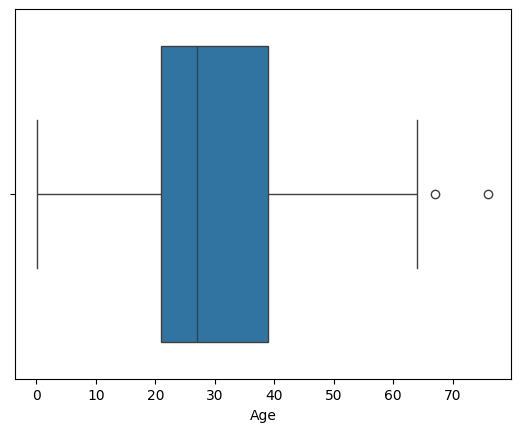

In [24]:
import seaborn as sns

sns.boxplot(data=titanic_data, x="Age")

In [28]:
titanic_data.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

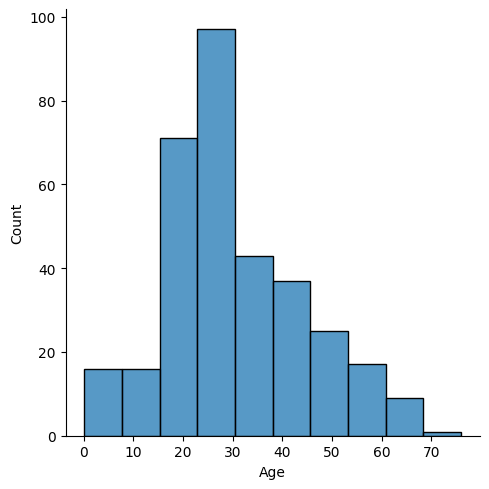

In [29]:
sns.displot(data=titanic_data, x='Age', bins=10, kde=False)

<Axes: xlabel='Age', ylabel='Fare'>

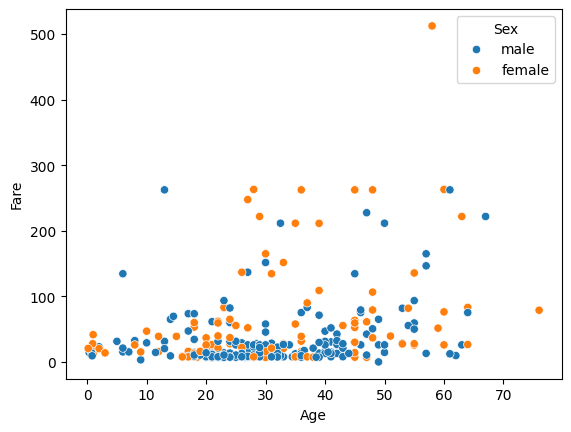

In [32]:
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Sex')

In [35]:
titanic_data.shape          #see the dimension of the data

(418, 12)

In [39]:
# Turkey's
# Q1 - 1.5 * IQR - Lower Limit
# Q3 + 1.5 * IQR - Upper Limit

q1 = titanic_data['Age'].quantile(.25)
q3 = titanic_data['Age'].quantile(.75)
iqr = q3 - q1

In [41]:
iqr

18.0

In [50]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower limit: ', lower_limit)
print('Upper limit: ', upper_limit)

Lower limit:  -6.0
Upper limit:  66.0


In [51]:
# what's the least number age?
print('Youngest: ', titanic_data['Age'].min())

Youngest:  0.17


In [52]:
# what's the oldest?
print('Oldest: ', titanic_data['Age'].max())

Oldest:  76.0


Upper Outliers

In [70]:
upper_outlier = (titanic_data['Age'] > upper_limit)

upper_outlier

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

#### To print the outliers only

In [76]:
outliers = titanic_data.Age[upper_outlier]
outliers

81    67.0
96    76.0
Name: Age, dtype: float64

Lets have a new dataset without the outliers

In [80]:
titanic_minus_upper_outliers = titanic_data[~upper_outlier]

titanic_minus_upper_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
titanic_data[upper_outlier]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


Visualize data without outliers

<Axes: xlabel='Age'>

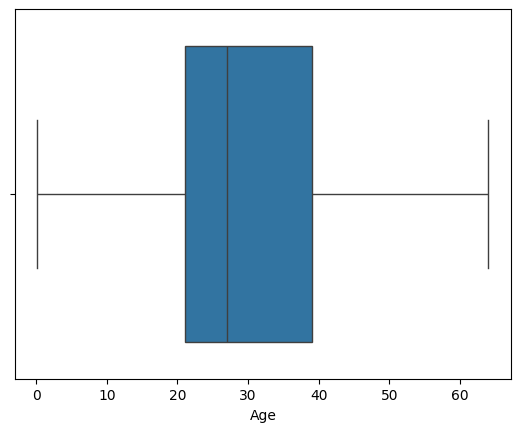

In [81]:
sns.boxplot(data=titanic_minus_upper_outliers, x='Age')

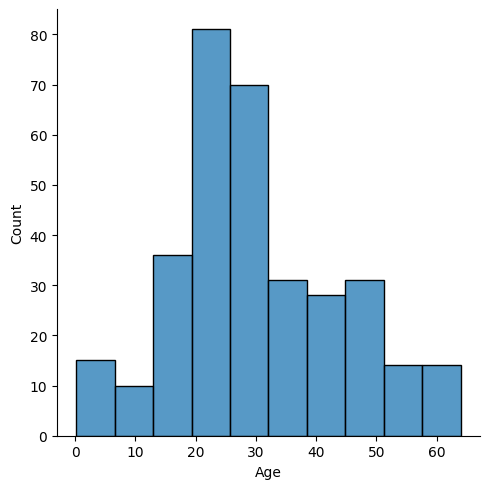

In [84]:
sns.displot(data=titanic_minus_upper_outliers, x='Age', bins=10, kde=False)

<Axes: xlabel='Age', ylabel='Fare'>

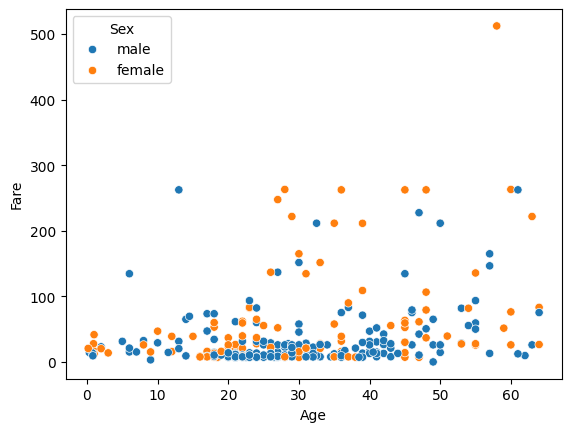

In [85]:
sns.scatterplot(data=titanic_minus_upper_outliers, x='Age', y='Fare', hue='Sex')

The visualizations no longer shows any form of outliers